 ## Support Vector Machine ( SVM) Classification

## 1. ESSENTIAL IMPORTS

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn import metrics
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## 2.  Data  Import and View

In [45]:
data = pd.read_csv("D:/FTI/Module 3 Supervised Machine Learning/Lecture3/Finance.csv") 

In [46]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


https://archive.ics.uci.edu/ml/datasets/bank+marketing

## 3. Checking for Missing Values

In [47]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 4. Checking for Data Types

In [48]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## 5. Apply normalization to Numeric Columns

In [49]:
num_col=[]
cat_col=[]
for col in data.columns:
    if data[col].dtype=='int64':
        num_col.append(col)
    else:
        cat_col.append(col)

In [50]:
df_num_col=data[num_col]
df_cat_col=data[cat_col]

In [51]:
from sklearn.preprocessing import StandardScaler
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_col]).round(3)
scaled = pd.DataFrame(scaled,columns=num_col)

In [52]:
df=pd.concat([df_cat_col,scaled], axis=1)

In [53]:
df

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,1.607,0.256,-1.298,0.011,-0.569,-0.411,-0.252
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,0.289,-0.438,-1.298,-0.416,-0.569,-0.411,-0.252
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,-0.747,-0.447,-1.298,-0.707,-0.569,-0.411,-0.252
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,0.571,0.047,-1.298,-0.645,-0.569,-0.411,-0.252
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,-0.747,-0.447,-1.298,-0.234,-0.569,-0.411,-0.252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes,0.948,-0.176,0.143,2.791,0.076,-0.411,-0.252
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes,2.831,0.120,0.143,0.768,-0.247,-0.411,-0.252
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes,2.925,1.430,0.143,3.374,0.722,1.436,1.050
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no,1.513,-0.228,0.143,0.970,0.399,-0.411,-0.252


In [54]:
data=df.copy()

## 6. Preprocessing

In [55]:
data['y'].replace(to_replace='yes', value=1, inplace=True)
data['y'].replace(to_replace='no',  value=0, inplace=True)

In [56]:
data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,unknown,may,unknown,0,1.607,0.256,-1.298,0.011,-0.569,-0.411,-0.252
1,technician,single,secondary,no,yes,no,unknown,may,unknown,0,0.289,-0.438,-1.298,-0.416,-0.569,-0.411,-0.252
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,0,-0.747,-0.447,-1.298,-0.707,-0.569,-0.411,-0.252
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,0,0.571,0.047,-1.298,-0.645,-0.569,-0.411,-0.252
4,unknown,single,unknown,no,no,no,unknown,may,unknown,0,-0.747,-0.447,-1.298,-0.234,-0.569,-0.411,-0.252


### Encoding 

In [57]:
df_dummies = pd.get_dummies(data)
df_dummies.head()

,y,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1.607,0.256,-1.298,0.011,-0.569,-0.411,-0.252,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0.289,-0.438,-1.298,-0.416,-0.569,-0.411,-0.252,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,-0.747,-0.447,-1.298,-0.707,-0.569,-0.411,-0.252,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0.571,0.047,-1.298,-0.645,-0.569,-0.411,-0.252,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,-0.747,-0.447,-1.298,-0.234,-0.569,-0.411,-0.252,0,0,...,0,0,1,0,0,0,0,0,0,1


### View Correlation 

<AxesSubplot:>

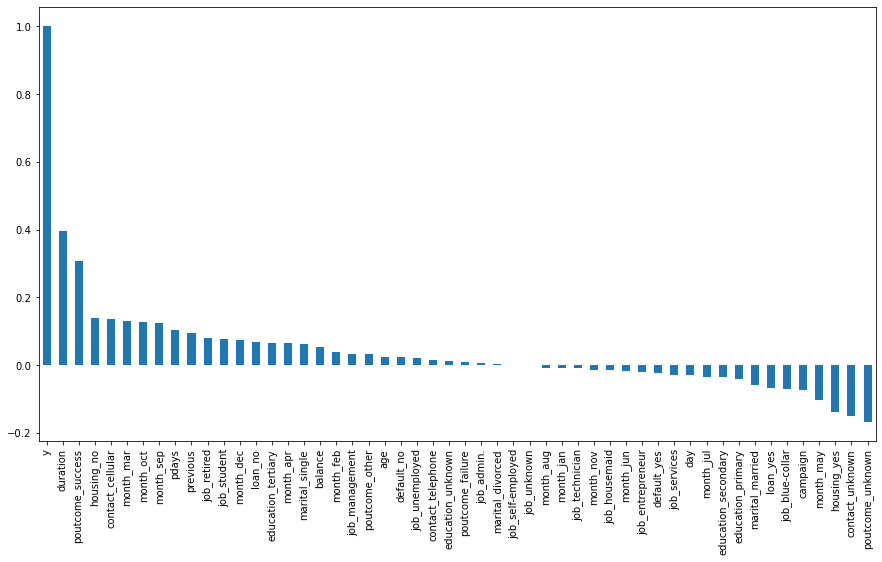

In [58]:
plt.figure(figsize=(15,8))
df_dummies.corr()['y'].sort_values(ascending = False).plot(kind='bar')

In [59]:
# We will use the data frame where we had created dummy variables
y = df_dummies['y'].values
X = df_dummies.drop(columns = ['y'])

## 7. Train Test Split

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 8. Model Fitting and Evaluation  (SVM)

In [61]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', probability=True).fit(X_train, y_train) 
prediction_test = clf.predict(X_test)

## Classification Report

In [62]:
def classification_report(model):
    prediction_test = model.predict(X_test)
    # Print the prediction accuracy
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
    classification = metrics.classification_report(y_test, prediction_test)
    probs = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, probs)


    print('============================== Model Evaluation ==============================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print('AUC: %.3f' % auc)
   

In [63]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : SVC(kernel='linear', probability=True)

 Model Accuracy:
 0.8923621350634031

Confusion matrix:
 [[11789   178]
 [ 1282   315]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.64      0.20      0.30      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

AUC: 0.904


## Confusion Matrix

In [64]:
class_names=[1,0]
def plot_conf_matrix(y_test, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

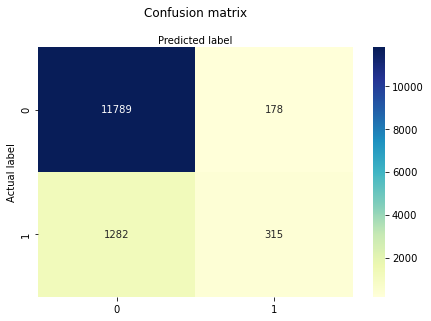

In [65]:
class_names=[0,1]
plot_conf_matrix(y_test, prediction_test, class_names)

## ROC Curve

In [66]:
def plot_roc(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='NB')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Naive Bayes ROC curve')
    plt.show()

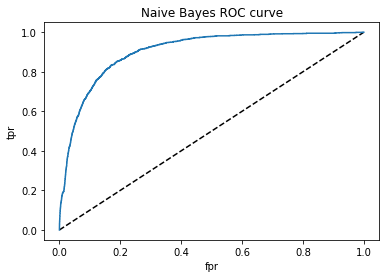

In [67]:
plot_roc(clf,X_test,y_test)

## GRID SEARCH SVM PARAMETERS 

## Data & Library Imports

In [68]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
  
cancer = load_breast_cancer()
  
# The data set is presented in a dictionary form:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


## Making a Dataframe 

In [69]:
df_feat = pd.DataFrame(cancer['data'],
                       columns = cancer['feature_names'])
  
# cancer column is our target
df_target = pd.DataFrame(cancer['target'], 
                     columns =['Cancer'])
  
print("Feature Variables: ")
print(df_feat.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

In [98]:
print("Dataframe looks like : ")
df_feat.head()

Dataframe looks like : 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train-Test split

In [72]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
                        df_feat, np.ravel(df_target),
                test_size = 0.30, random_state = 101)

## Fitting a Model 

In [100]:
# train the model on train set
model = SVC(probability=True)
model.fit(X_train, y_train)


SVC(probability=True)

## Model Evaluation

In [101]:
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [102]:
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.964


## Grid Search

In [94]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, cv=5,scoring='precision')
  
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='precision')

In [95]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.001)


## New Model with Seletced Parameters 

In [96]:
model = SVC(kernel='rbf' ,C=1,gamma=0.0001,probability=True)

In [97]:
model.fit(X_train, y_train)
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

